In [2]:
import subprocess

with open('data.txt', 'r') as infile, open('data_output.txt', 'w') as outfile:
    process = subprocess.run(['../qhull_original/bin/qconvex', 'o'], stdin=infile, stdout=outfile, stderr=subprocess.PIPE)

if process.returncode != 0:
    print('Error:', process.stderr.decode())

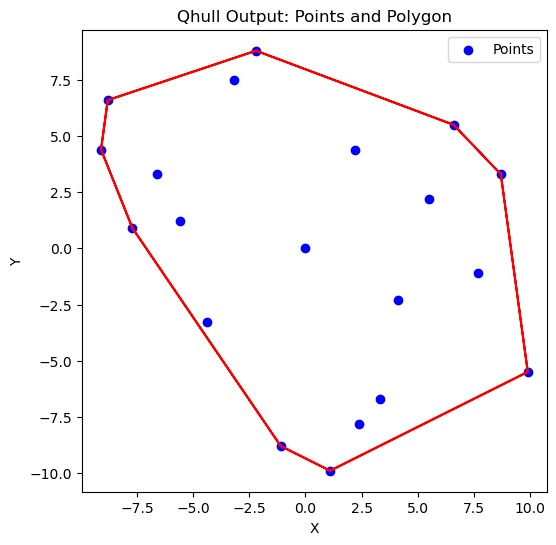

In [3]:
import matplotlib.pyplot as plt
import numpy as np

with open('data_output.txt', 'r') as f:
    lines = [line.strip() for line in f if line.strip()]

dim = int(lines[0])
n_points, n_facets, n_ridges = map(int, lines[1].split())

# Read points
points = []
for i in range(2, 2 + n_points):
    coords = list(map(float, lines[i].split()))
    points.append(coords)
points = np.array(points)

# Read facets (indices are 0-based)
facets = []
for i in range(2 + n_points, 2 + n_points + n_facets):
    parts = list(map(int, lines[i].split()))
    n_vertices = parts[0]
    indices = parts[1:]  # Already 0-based
    facets.append(indices)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

for facet in facets:
    # Close the polygon by repeating the first point at the end
    facet_closed = facet + [facet[0]] if len(facet) > 1 else facet
    polygon = points[facet_closed]
    plt.plot(polygon[:, 0], polygon[:, 1], 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Qhull Output: Points and Polygon')
plt.legend()
plt.axis('equal')
plt.show()